In [53]:
import numpy as np
# Условие
data = np.array(
    [
        [3, 51, 3, 0, 1, 0, 2200],
        [1, 30, 1, 0, 1, 0, 1600],
        [2, 45, 2, 0, 1, 0, 1900],
        [3, 55, 1, 0, 1, 0, 2000],
        [1, 45, 3, 1, 0, 0, 4500],
        [3, 100, 3, 1, 0, 0, 7000],
        [2, 71, 2, 1, 0, 0, 5000],
        [1, 31, 2, 0, 0, 1, 1700],
        [3, 53, 5, 0, 0, 1, 2100],
        [1, 33, 3, 0, 0, 1, 1500],
        [2, 43, 5, 0, 0, 1, 2000],
    ]
)

# Задание 1

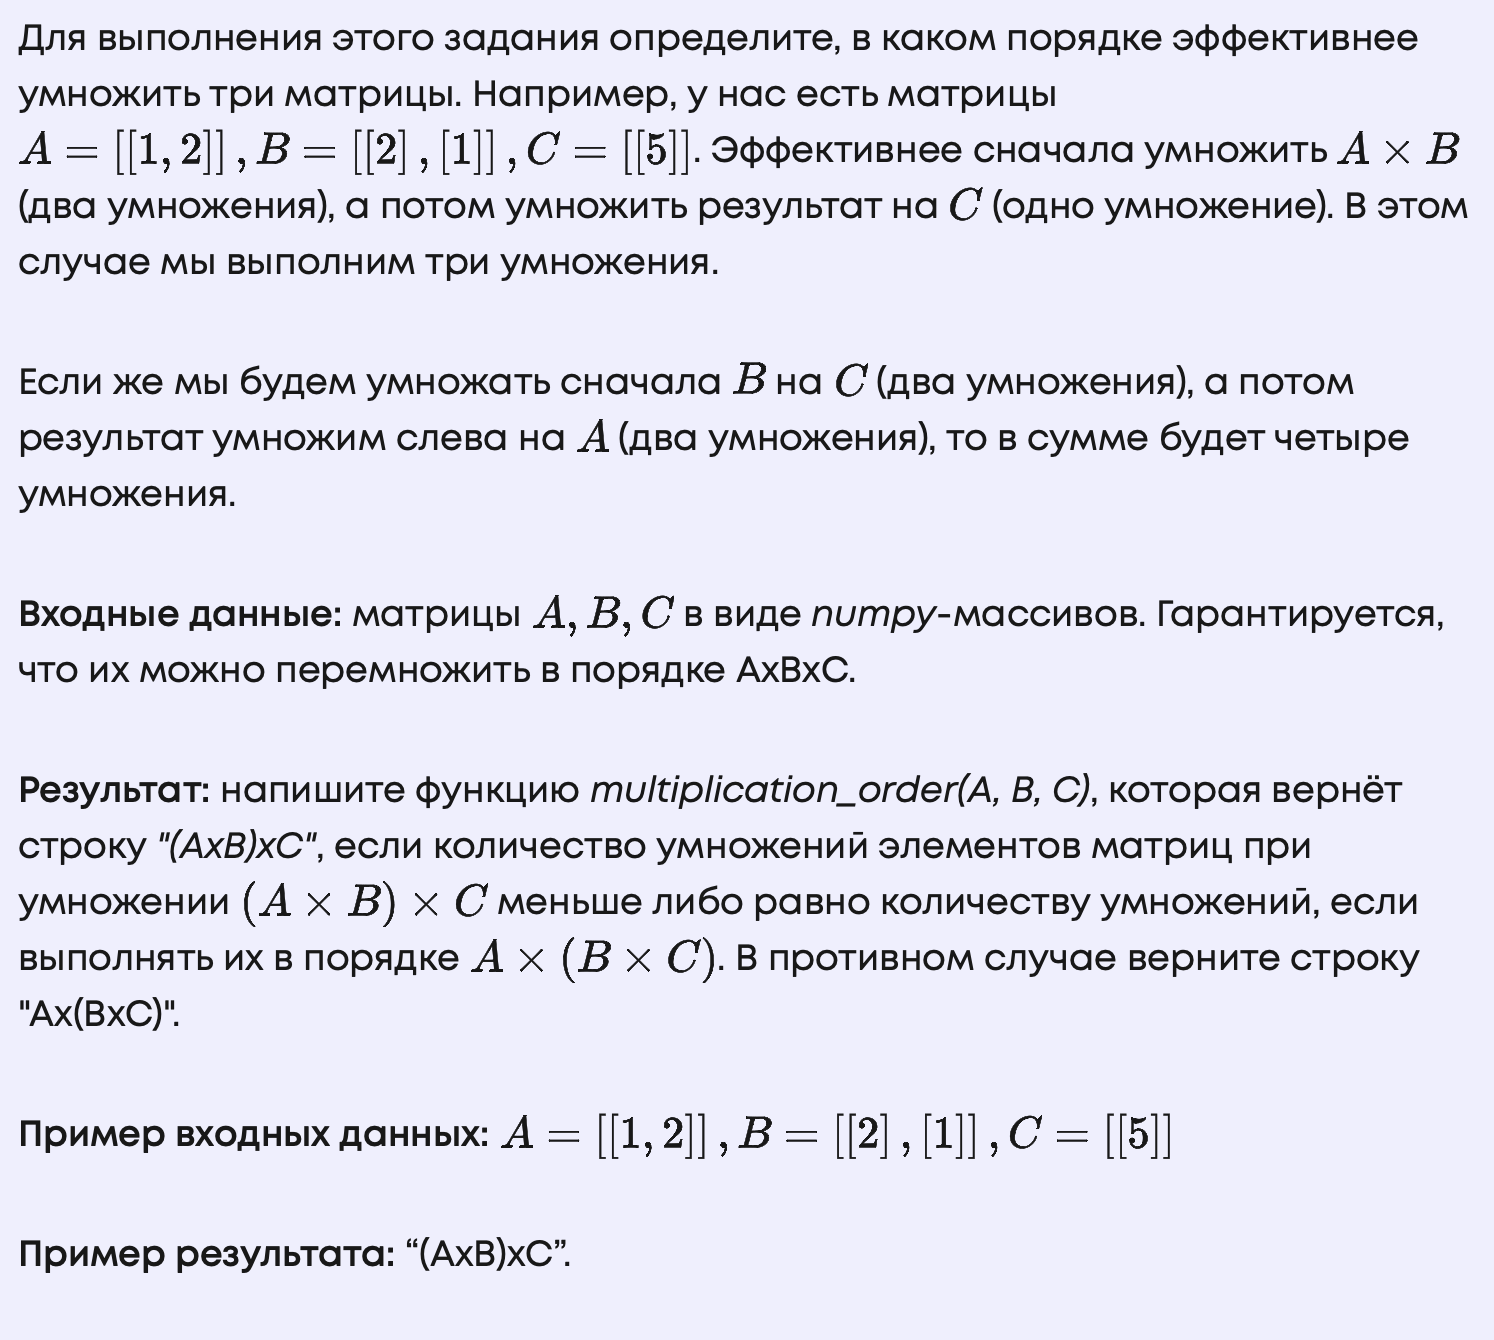

In [54]:
def multiplication_order(A: np.array, B: np.array, C: np.array) -> str:
    # Проверка, что входные данные являются матрицами
    if not (isinstance(A, np.ndarray) and isinstance(B, np.ndarray) and isinstance(C, np.ndarray)):
        raise ValueError("Все входные данные должны быть numpy-массивами.")

    if len(A.shape) != 2 or len(B.shape) != 2 or len(C.shape) != 2:
        raise ValueError("Все входные данные должны быть двумерными матрицами.")

    # Размерности матриц
    m1, n1 = A.shape
    m2, n2 = B.shape
    _, n3 = C.shape

    # Проверка возможности умножения
    if n1 != m2:
        raise ValueError("Количество столбцов матрицы A должно совпадать с количеством строк матрицы B для умножения A*B.")

    if n2 != C.shape[0]:
        raise ValueError("Количество столбцов матрицы B должно совпадать с количеством строк матрицы C для умножения B*C.")

    # Расчет количества операций для каждого варианта
    operations_1 = (m1 * n1 * n2) + (m1 * n2 * n3)
    operations_2 = (m2 * n2 * n3) + (m1 * n1 * n3)

    if operations_1 <= operations_2:
        return "(AxB)xC"
    else:
        return "Ax(BxC)"

Проверим на тестовых данных:

In [55]:
def test_case_ok():
    A = np.array([[1, 2]])
    B = np.array([[2], [1]])
    C = np.array([[5]])
    try:
        print(multiplication_order(A, B, C))
    except ValueError as err:
        print(err)
        
def test_case_not_matrix():
    A = np.array([1, 2])
    B = np.array([[2], [1]])
    C = np.array([[5]])
    try:
        print(multiplication_order(A, B, C))
    except ValueError as err:
        print(err)
        
        
def test_case_dimensions_error():
    A = np.array([[1]])
    B = np.array([[2], [1]])
    C = np.array([[5]])
    try:
        print(multiplication_order(A, B, C))
    except ValueError as err:
        print(err)
        

test_case_ok()
test_case_not_matrix()
test_case_dimensions_error()



(AxB)xC
Все входные данные должны быть двумерными матрицами.
Количество столбцов матрицы A должно совпадать с количеством строк матрицы B для умножения A*B.


# Задание 2

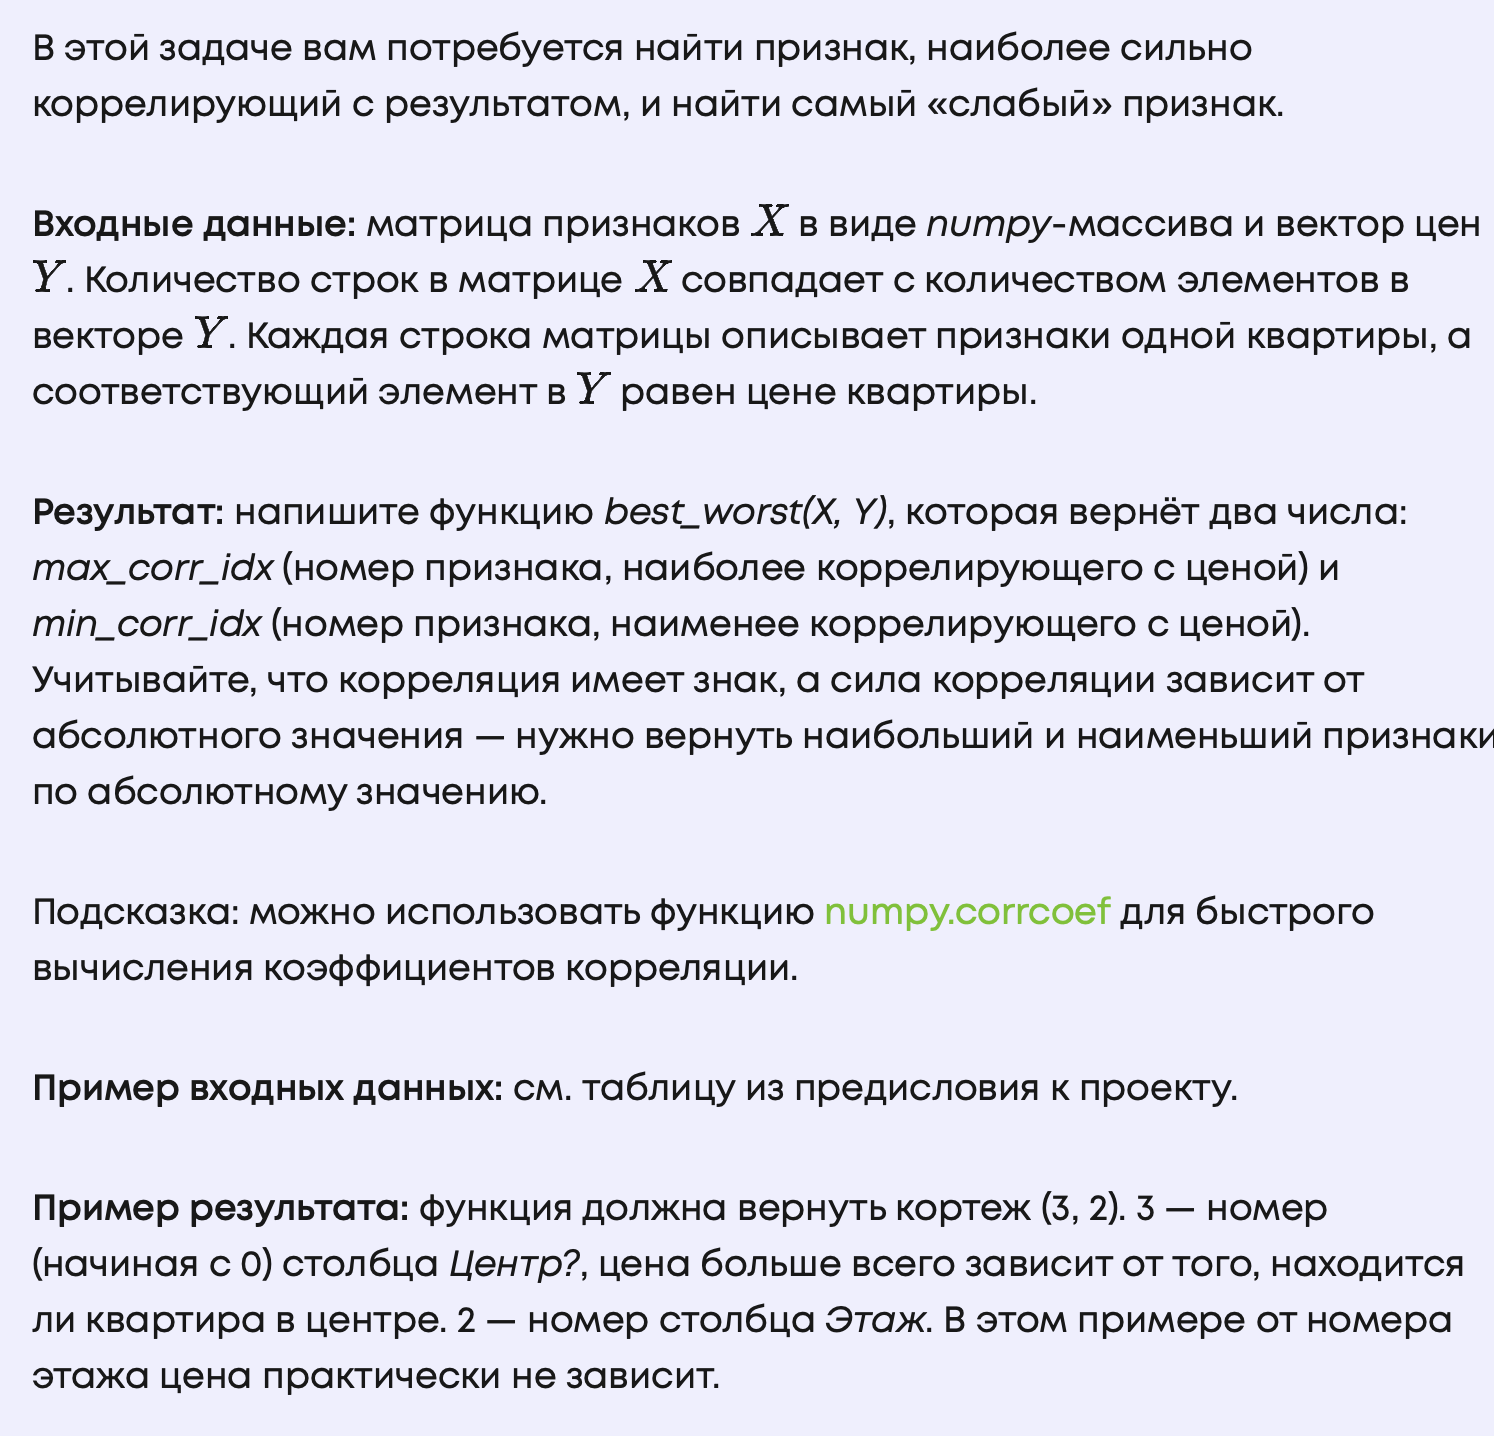

In [56]:
def best_worst(x: np.array, y: np.array):

    # Добавим y как столбец в x для расчета корреляции
    x_y = np.column_stack((x, y))

    # Вычисляем корреляционную матрицу
    corr_matrix = np.corrcoef(x_y, rowvar=False)

    # Получаем корреляции между признаками x и y (последний столбец корреляционной матрицы)
    y_corr = corr_matrix[-1, :-1]

    # Находим индекс максимальной и минимальной корреляции по абсолютному значению
    max_corr_i = np.argmax(np.abs(y_corr))
    min_corr_i = np.argmin(np.abs(y_corr))

    return (max_corr_i, min_corr_i)

Проверка на тестовых данных:

In [57]:
best_worst(data[:, :-1], data[:, -1])

(3, 2)

# Задание 3

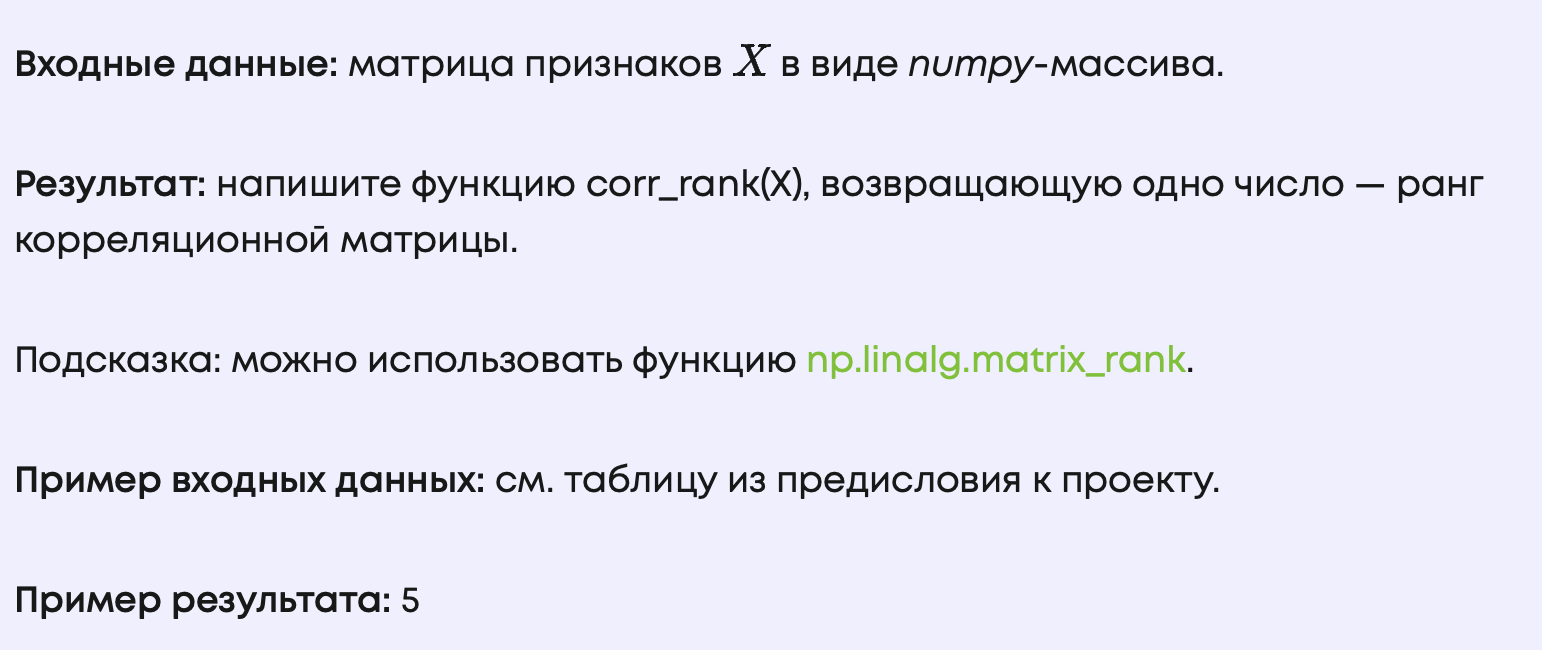

In [58]:
def corr_rank(X: np.array) -> int:

    # Вычисляем корреляционную матрицу для признаков X
    corr_matrix = np.corrcoef(X, rowvar=False)

    # Находим ранг корреляционной матрицы
    rank = np.linalg.matrix_rank(corr_matrix)

    return rank

Проверка на тестовых данных:

In [59]:
corr_rank(data[:, :-1])

5

# Задание 4

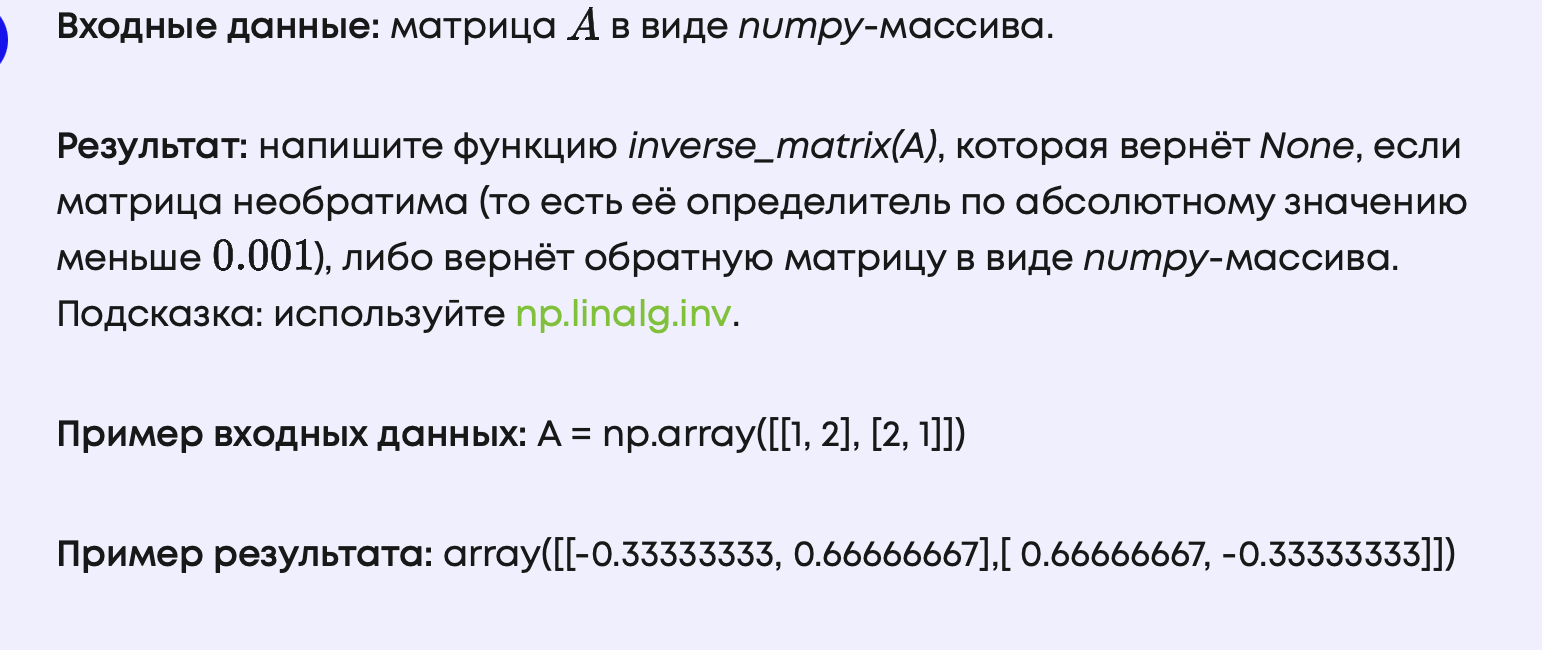

In [60]:
def inverse_matrix(A: np.array) -> np.array:
    
    # Если определитель слишком мал (по абсолютному значению), матрица необратима
    if abs(np.linalg.det(A)) < 0.001:
        return None
    else:
        # Иначе вычисляем и возвращаем обратную матрицу
        return np.linalg.inv(A)

Проверка на тестовых данных:

In [61]:
A = np.array([[1, 2], [2, 1]])

inverse_matrix(A)

array([[-0.33333333,  0.66666667],
       [ 0.66666667, -0.33333333]])

# Задание 5

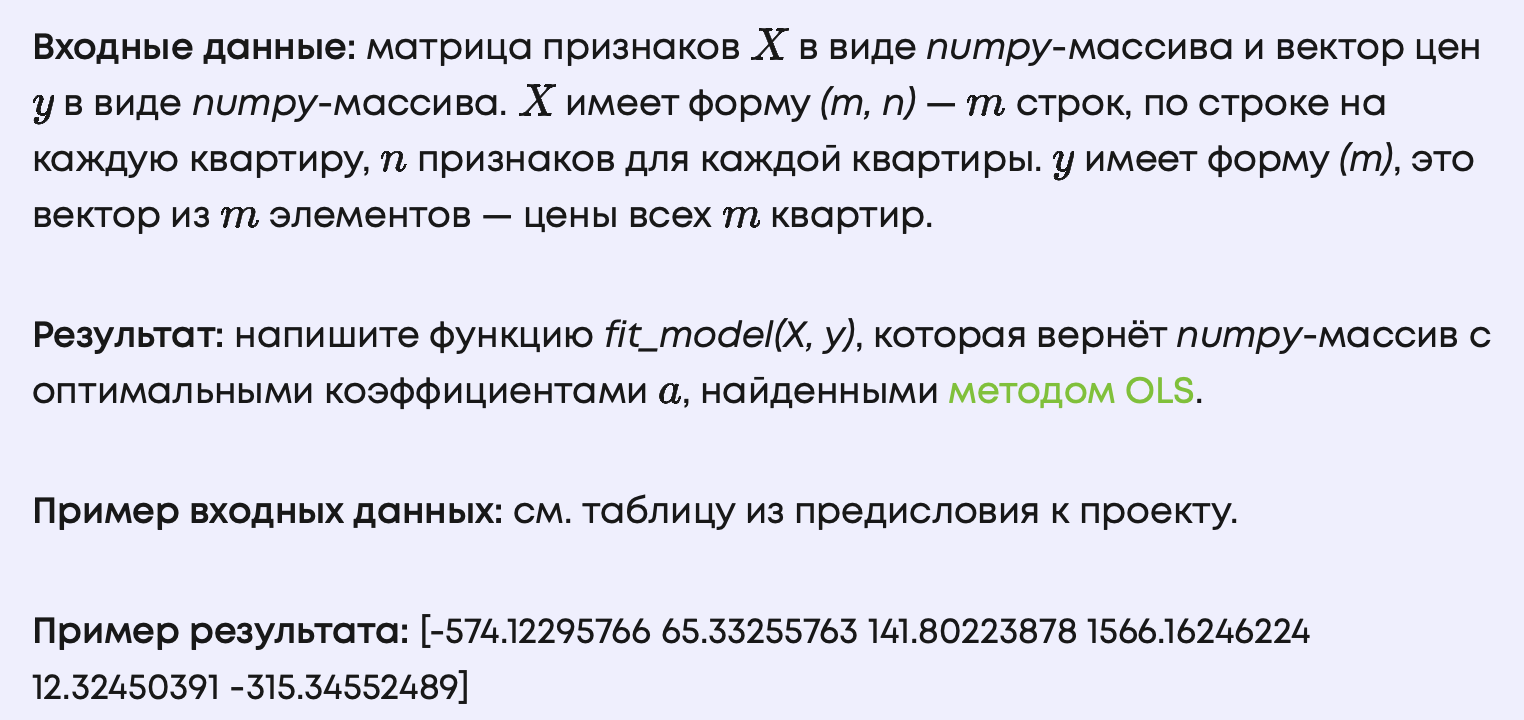

In [62]:
def fit_model(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

Проверка на тестовых данных:

In [63]:
fit_model(data[:, :-1], data[:, -1])

array([-574.12295766,   65.33255763,  141.80223878, 1566.16246224,
         12.32450391, -315.34552489])